# **Linear Regression**

*Ecuación del modelo de Regresión Lineal*

$$\hat y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $$

* $\hat y$ es el valor predecido
* $n$ es el número de características
* $x_i$ es el valor de la característica $i^{th}$
* $\theta_j$ es el parámetro $j^{th}$ del modelo (incluido el bias y los pesos)

*Forma vectorizada*
$$\hat y = h_\theta(x) = \theta · x$$
---
Para medir el rendimiento del modelo, se utilizó anteriormente la métrica *Root Mean Square Error* (*RMSE*). Cuando se entrena un modelo de Regresión Lineal, se requiere encontrar el valor de $\theta$ que minimice el *RMSE*. En la práctica es más fácil minimizar *MSE* que *RMSE*, y se obtiene el mismo resultado (porque el valor que minimiza una función también minimiza su raíz).

La *MSE* de una hipótesis $h_\theta$ de un modelo de Regresión Lineal entrenado con el set $X$ es calculado utilizando

*Función de pérdida MSE de un modelo de Regresión Lineal*

$$MSE(X, h_\theta) = \frac{1}{m}\sum\limits_{i=1}^{m} (\theta^Tx^{(i)}-y^{(i)})^2$$

---
## **Ecuación Normal**
Para encontrar el valor de $\theta$ que minimiza la función de pérdida, existe una solución de forma cerrada, es decir, una ecuación matemáticca que da un resultado directo, denominada como la *ecuación Normal*

*Ecuación Normal*

$$\hat\theta = (X^TX)^{-1}X^Ty$$
* $\hat\theta$ es el valor de $\theta$ que minimiza la función de pérdida
* $y$ es el vector de los valores objetivos que contienen $y^{(i)}$ hasta $y^{(m)}$

**Se generará algunos datos de prueba**

In [ ]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4+3 * X + np.random.randn(100,1)

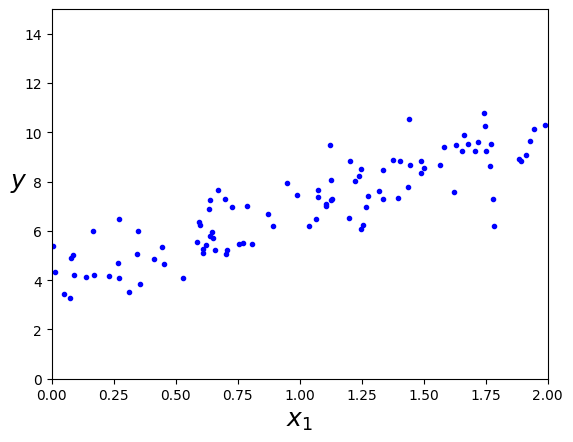

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

Calcular $\hat\theta$ empleando la Ecuación Normal.

In [ ]:
X_b = np.c_[np.ones((100,1)), X] # Añadir x0=1 para cada instancia
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

La función que se empleo para generar los datos fue $y = 4 + 3x_1 + Gaussian noise$

In [ ]:
theta_best

array([[4.04412942],
       [2.93463232]])

Se esperaba un 4 y 3, pero el ruido hace imposible recuperar exactamente los parámetros originales.

Ahora se puede hacer predicciones utilizando $\hat\theta$

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.04412942],
       [9.91339407]])

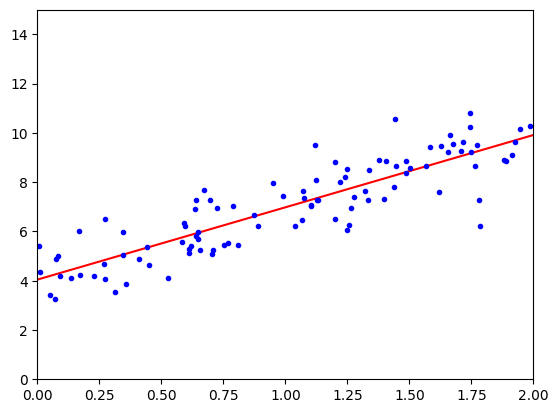

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

Realizar una Regresión Lineal utilizando Scikit-Learn es un poco más simple.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[4.04412942],
       [9.91339407]])

La Clase `LinearRegression` está basada en la función `scipy.linalg.lstsq()`, la cual se peude llamar directamente.

In [ ]:
theta_best_svd, residuales, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.04412942],
       [2.93463232]])

## **Complejidad Computacional**

La ecuación Normal calcula la inversa de $X^TX$, que es una matriz $(n+1) Χ (n+1)$. Si se dobla el número de características, se multiplica el tiempo de computación ppr $2^{2.4} = 5.3$ a $2^3 = 8$.

Cuando se utiliza `LinearRegression`está alrededor de  $O(n^2)$. Si se dobla el número de características, se multiplica el tiempo de computación por 4 aproximadamente.

Tanto la ecuación normal como el enfoque SVD se vuelven muy lentos cuando el número de características aumenta (por ejemplo, 100.000). En el lado positivo, ambos son lineales con respecto al número de instancias en el conjunto de entrenamiento (son $O(m)$), por lo que manejan grandes conjuntos de entrenamiento de manera eficiente, siempre que quepan en la memoria. grandes conjuntos de entrenamiento, siempre que quepan en la memoria.

Además, una vez entrenado el modelo de regresión lineal (mediante la ecuación normal o cualquier otro algoritmo), las predicciones son muy rápidas: la complejidad computacional es lineal con respecto al número de instancias sobre las que se desea realizar predicciones y al número de características. y el número de características. En otras palabras, **hacer predicciones sobre el doble de instancias (o el doble de características) llevará aproximadamente el doble de tiempo**.



# **Gradient Descent** (algoritmo de optimización, no es una función de pérdida)

La idea genera del Descenso del gradiente es ajustar los parámetros de forma iterativa para minimizar una función de coste. Midea el gradiente local de la función de pérdida para obtener el parámetro $\theta$. Una vez que el graidente sea 0, se ha alcanzado el mínimo.

Un aspecto importante a detemrinar es el tamaño de los pasos, que se ajusta con el hiperparámetro *learning rate*. Si el *learning rate* es muy pequeño, entonces el algoritmo necesitará muchas iteraciones para converger. Por el contrario, si el *learning rate* es muy grande, quizá nunca converja el algoritmo.

También existen los mínimos locales, los cuales hacen que converger al mínimo global sea más complicado. Afortunadamente, **la función de pérdida *MSE* de un modelo de regresión lineal resulta ser una función convexa, lo que significa que si elegimos dos puntos cualesquiera de la curva, el segmento de recta que los une nunca cruza la curva**. Esto implica que **no hay mínimos locales, sino un único mínimo global**. También es una función continua con una pendiente que nunca cambia abruscamente. Estos dos hechos tienen una gran consecuencia: El descenso del gradiente está garantizado que se acercará arbitrariamente al mínimo global (si se espera lo suficiente y si la tasa de aprendizaje no es demasaida alta).

# **Batch Gradient Descent**

Se necesita calcular cuánto variará la función de pérdida si se cambia un poco $\theta_j$. Esto es una derivada parcial.

*Derivadaa parcial de la función de pérdida*.

$$
\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} \left( (\theta^T x^{(i)} - y^{(i)}) x_j^{(i)} \right)
$$

*Vector de Gradiente de la función de pérdida*
$$
\nabla_{\theta} MSE(\theta) = \begin{bmatrix}
\frac{\partial}{\partial \theta_0} MSE(\theta) \\
\frac{\partial}{\partial \theta_1} MSE(\theta) \\
\vdots \\
\frac{\partial}{\partial \theta_n} MSE(\theta)
\end{bmatrix} = \frac{2}{m} X^T(X\theta - y)
$$

Notar que el *Batch Gradient Descent* utiliza el batch completo de entrenamiento en cada paso. Como resultado es terriblemente tardado en sets muy gradnes. Aún así, en modelos de Regresión Lineal, es mucha más rápido que el uso de la Ecuación Normal o descomposición SVD.


In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients
theta

array([[4.04412942],
       [2.93463232]])

Fue exactamente lo que enconetra la Ecuación Normal. **¿Y si se usa distinto *Learning rate*?**

In [ ]:
X_new_b.dot(theta)

array([[4.04412942],
       [9.91339407]])

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

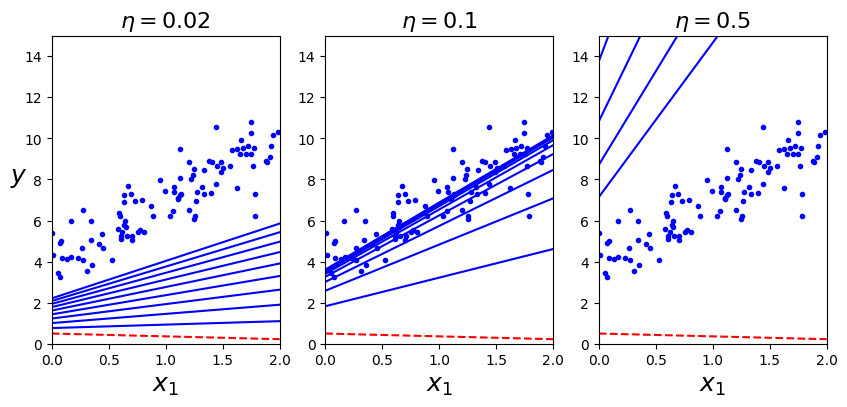

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

En la izquierda, el LR es muy lento, eventualmente alcanzará la solución, pero tomará mucho tiempo. En la figura del medio, el LR luce bien, en solo unas cuantas iteraciones ya alcanzó la solución. EN la derecha, el LR es muy alto, el algoritmo diverge, haciendo saltos muy grandes e inclusive alejádose cada vez más de la solución.

## **Tasa de convergencia**
Cuando la función de coste es convexa y su pendiente no cambia bruscamente (como es el caso de la función de coste +MSE*), el *Batch Gradient Descent* con una tasa de aprendizaje fija acabará convergiendo a la solución óptima, pero es posible que tenga que esperar un poco: puede tardar $O(1/ϵ)$ iteraciones en alcanzar el óptimo dentro de un rango de ϵ dependiendo de la forma de la función de coste. Si se divide la tolerancia por 10 para tener una solución más precisa solución, entonces el algoritmo puede tener que correr unas 10 veces más.


## **Descenso del Gradiente Estocástico**
El mayor problema del *Batch Gradient Descent* es que toma el set completo de entrenamiento para calcular sus gradientes, lo cual lo vuelve muy lento. *Stochastic Gradient Descent* solamente toma una instancia aleatoria del set de entrenamiento en cada paso y calcula los gradientes basados en **una sola instancia**.

Su desventaja es que a lo largo del tiempo se aproximará al mínimo, pero una vez que esté ahí, continuará saltando al rededor, sin establecerse en algún punto. Así que una vez que el algoritmo se detenie, los valores de los parámetros finales son buenos, pero no óptimos.

Dada esta irregularidad, puede ser de ayuda al algoritmo para superar los mínimos locales, de forma que tienen mayores oportunidades de encontrar el mínimo global que el *batch Gradient Descent*.

**La solución a este dilema entre encontrar un valor óptimo y superar los mínimos locales se resuelve reduciendo gradualemnte la tasa de aprendizaje**. La función que determina la tasa de aprendizaje en cada iteración se le conoce como ***learning schedule***.

El siguiente código implementa un *Stochastic Gradient Deschent* empleando un *learning schedule* simple

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

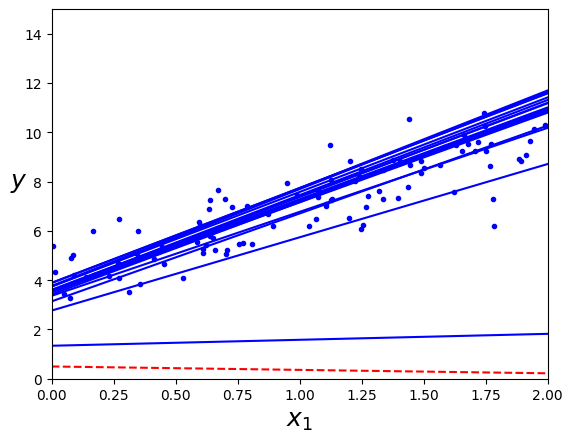

In [ ]:
n_epochs = 50
t0, t1 = 5,50 # hiperparámetros de learning schedule

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20:                    # not shown in the book
      y_predict = X_new_b.dot(theta)           # not shown
      style = "b-" if i > 0 else "r--"         # not shown
      plt.plot(X_new, y_predict, style)        # not shown
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta-eta*gradients
    theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()

In [ ]:
theta

array([[3.98659528],
       [2.96546823]])

Cuando se emplea el *Stochastic Gradient Descent*, las isntancias en el set de entrenamiento **deben ser independientes e identicamentes distribuidas**. Lo más conveniente es barajar las instancias durante el entrenamiento, porque de otra forma, el algoritmo optimizaría primero para una etiqueta, luego para la siguinete, y nunca se acercaría el mínimo global.  

El siguinete algoritmo implementa SGD. Corre como máximo 1000 épocas o hasta que la pérdida caiga a menos de 1e-3 durante una época, comenzando con la tasa de aprendizaje de 0.1.

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.04019191]), array([2.94540424]))

## **Mini Batch Gradient Descent**

Es muy fácil de entenderlo. Este calcula los gradientes basado en un set aleatorio de isntancias llamado *mini-batches*. Su principal ventaja es que se puede tener una mejora de rendimiento con hardware especialmente si se utilizan GPUs.

Obtendrá valores óptimos, pero le será difícil superar mínimos locales.


In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)


In [ ]:
theta

array([[4.06254963],
       [2.95954594]])

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

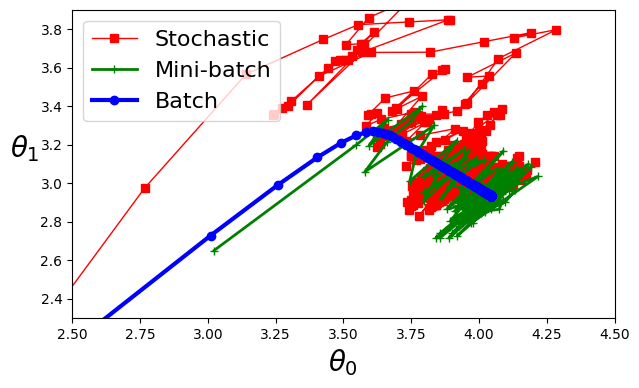

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# **Regresión Polinomial**
---
¿Qué ocurre si los datos son más complejos que una simple línea reacta? Sorprendentemente, se puede utilizar un modelo para entrenar **datos no lineales**. Una forma simple de hacerlo es **agregar potencias de cada una de las características como nuevas características**, luego, entrenar un modelo lineal en este set de características extendido. Esta técnica es llamada ***Regresión polinomial***.

In [ ]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [ ]:
m = 100
X = 6*np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.rand(m,1)

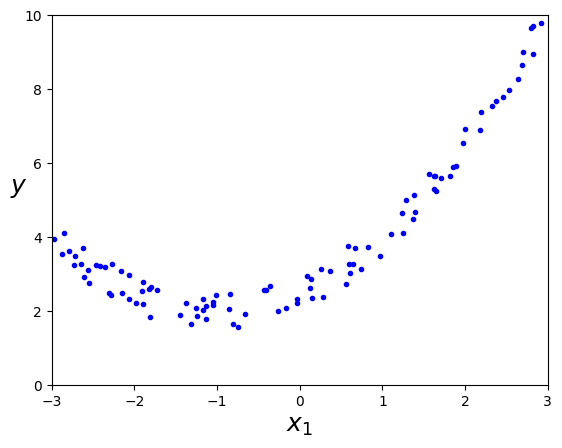

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.49786712]), array([[0.9943591 , 0.49967213]]))

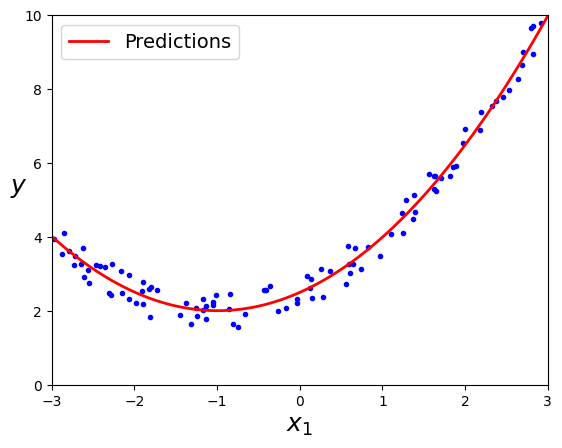

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## **Learning Curves**

Hay que tener en cuenta que se puede entrenar a un modelo con una Regresión Polinomial cuadrático (grado 2), o de cualquier grado, por ejemplo, grado 300. Este último se adaptará más a los datos, pero generará un *overfitting*. Entonces, ¿Cómo se elige la complejidad del modelo? ¿Cómo se puede decir que un modelo está sobreentrenado o subentrenado?




In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

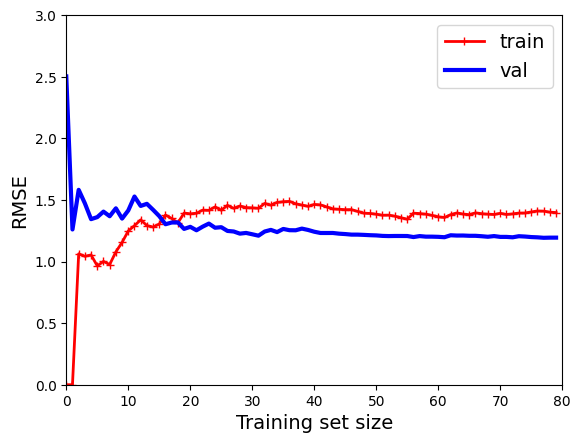

In [ ]:

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()                                      # not shown

El error en ambas en grande cuando son pocas muestras de entrenamiento, conforme avanza la cantidad de muestras, el modelo es capaz de generalizar apropiadamente, lo cual es la razón de que el error de validación disminuya. Es importante resaltar que una línea recta no puede hacer un buen trabajo para modelar los datos, de forma que el error acaba en una meseta, muy cerca de la otra curva.

***Estas líneas son típicas de modelo subentrenado***. Ambas curvas han alcanzado una meseta, son cercanas y muy altas.


***Nota: Si tu modelo está subentrenado, añadir más muestras de entrenamiento no ayudará. Necesitas usar modelos más complejos o mejorar las características.***

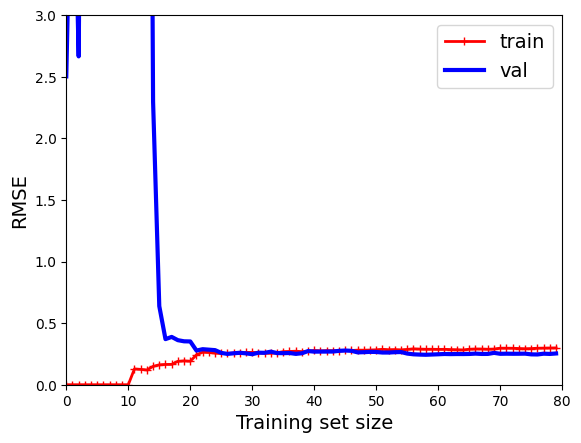

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

Estás curvas de aprendizaje lucen parecidas a las anterioes, pero hay dos diferencias importantes:
* El error en los datos de entrenamiento es más bajo que con el modelo de regresión Lineal.
* Hay una brecha entre las curvas. Esto significa que el modelo tiene un rendimiento significativamente mejor en los datos de entrenamiento que en los datos de validación, lo cual es una marca de sobreajuste.


***Nota: Una forma de mejorar un modelo sobreajustado es alimentarlo con más datos hasta que el error de validación alcance al error de entrenamiento.***


# **The Bias/Variance Tradeoff**

Un resultado importante teórico de la estadística y del Machine Learning es el hecho de que la generalización del error de un modelo puede ser expresado como la suma de tres errores diferentes:

***Bias***

  **Debido a asunciones erróneas**, como el asumir que los datos son lineales cuando de hecho son cuadráticcos. Un modelo de bias alto es como subajustar los datos de entrenamiento.

***Variance***

  **Se debe a la excesiva sensibilidad a las pequeñas variaciones en los datos de entrenamiento**. Un modelo con muchos grados de libertad (como un modelo polinomial de alto grado) es como tener una varianza alta, lo que implica el sobreajuste de los datos de entrenamiento.

***Irreducible error***

  **Debido al ruido de los mismos datos**. La única forma de reducir esta parte del error es limpiar los datos (por ejemplo, arreglar las fuentes de los datos, como sensores rotos).

***Incrementar la complejidad del modelo incrementará la varianza y reducirá el bias. De forma contrario, reducir la complejidad del modelo incrementará el bias y reducirá la varianza. Por esto es un tradeoff.***

# **Regularized Linear Models**
---
Una buena forma de reducir el sobreajuste es regularizar el modelo: Mientras menos grados de libertad tiene, más difícil será para él sobreajustar los datos. Por ejemplo, una manera simple de regularizar un modelo polinomial es reducir el número del grado polinomial.

Para un modelo lineal, se consigue normalemnte restringiendo los pesos del modelo.

## **Ridge Regression**
Es una versión regularizada de un modelo de regresión lineal. Se forza al algoritmo a no solo entrenador los datos, sino también, mantener los pesos del modelo tan pequeños como se pueda.

Ridge Regression cost function.

$$ J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2 $$

Es importante escalar los datos (StandardScaler) antes de implementar Ride Regression, dado que es sensitivo a la escala de los valores de entrada.

En las siguinetes líneas de cóidgo se realizará un **Ridge Regression** con Scikit-Learn utilizando la solución de forma cerrada.

Ridge Regression closed-form solution.

$$ \hat{\theta} = (X^T X + \alpha A)^{-1} X^T y $$


In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [ ]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

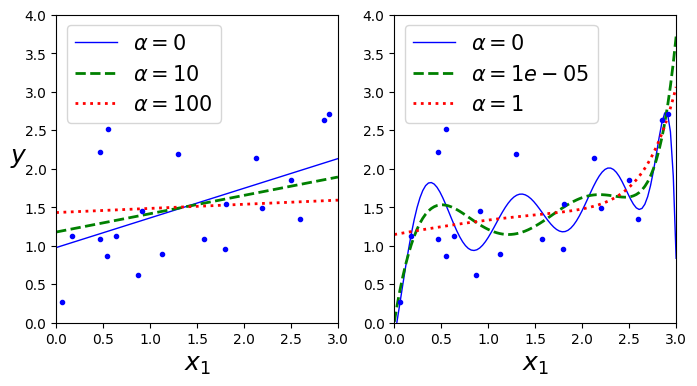

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

## **Lasso Regression**
*Least Absolute Shrinkage and Selection Operator Regression* o simplemente llamado (*Lasso Regression*). Justo como la *Ride Regression*, añade una término de regularización a la función de pérdida.

Lasso Regression cost function.

$$ J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} |\theta_i| $$


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


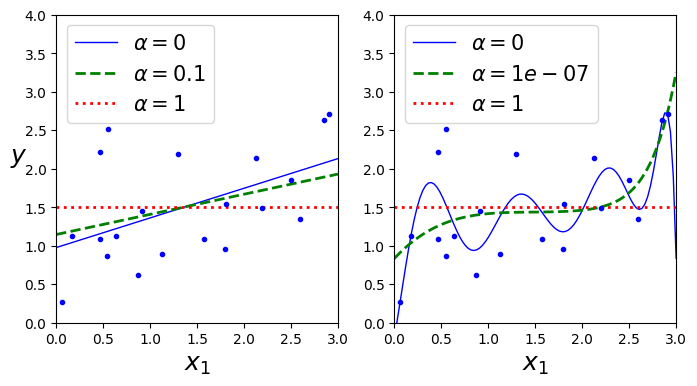

In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

Una característica importante de *Lasso Regression* es que tiende a eliminar completamente los pesos de las últimas características importantes. Es decir, Lasso Regression hace una selección de características automática y retorna un *sparse model*.




## **Elastic Net**
Es un punto medio entre *Ride Regression* y *Lasso Regression*. EL término de regularización es un conjunto de los témrinos de Ridge y Lasso, y se puede controlar con el radio *t*. Cuando *r=0*, Elastic Net es igual a Ridge Regression, y cuando *r=1* es equivalente a la Lasso Regression.

Elastic Net cost function

$$ J(\theta) = MSE(\theta) + r\alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_i^2 $$


¿Cuál es preferible? Ridge es buena para iniciar, pero si se sospecha que solo unas pocas características son útiles, entonces se debería elegir Lasso o Elastic Net, pues tienden a reducir los pesos a 0 de las características inútiles. En general, Elastic Net es preferible antes que Lasso pues esta última puede comportanse erráticamente cuando el número de características es mayor que el número de muestras o cuando muchas características están fuertemente relacionadas.


In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## **Early Stopping**
Una forma diferente de regularizar algoritmos iterativos como el Gradiente del Descenso es parar el entrenamiento cuando el error de validación alcance al mínimo. Esto es conocido como ***Early Stopping***.

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [ ]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

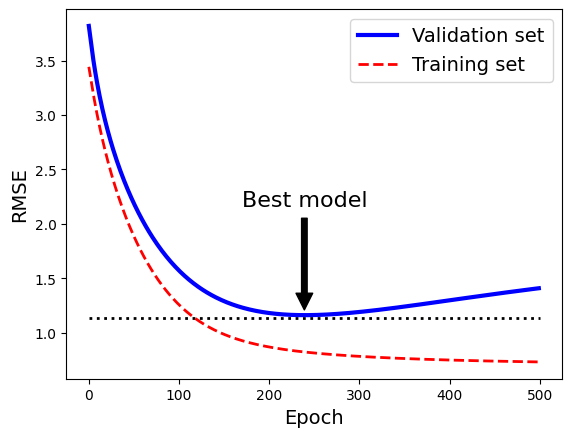

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

Con un Descenso del Gradiente Estocástico y Mini-batch, las curvas no son tan suaves, y puede que sea difícil de saber donde si se ha alcanzado el mínimo.

In [ ]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=None, warm_start=True))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

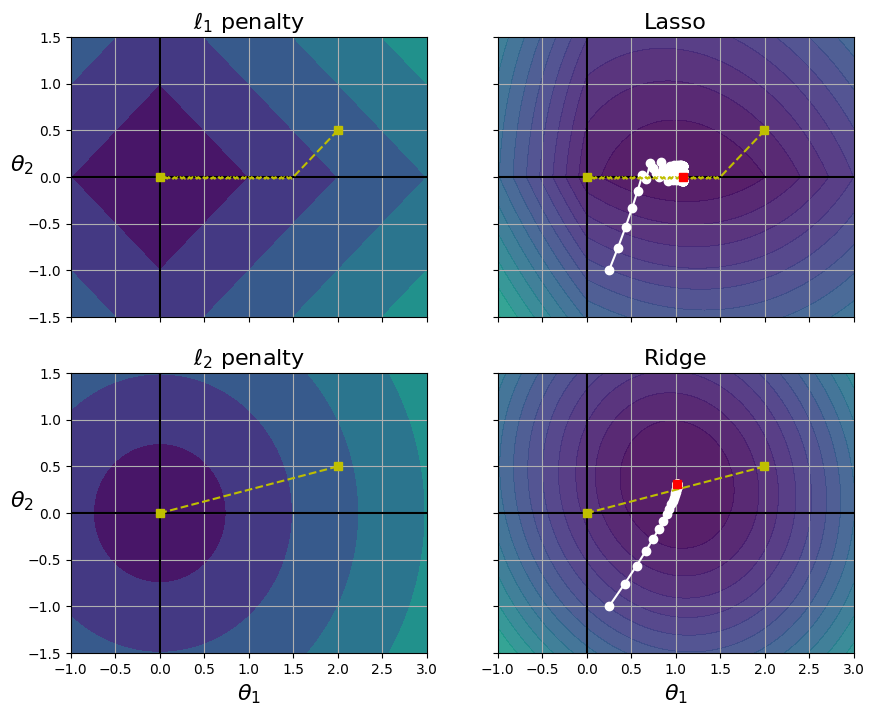

In [ ]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2

    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.show()

### **Conclusión**

* **1. Ridge Regression**:
  * Manejo de Colinealidad. Penaliza los coeficiente de regresión con la normal L2, lo cual es eficaz para manejar el problema de colinealidad entre las variables, donde las variables predictivas están altamente correlacionadas entre sí.
  * Reducción de la Varianza. Ayuda a reducir la varianza de las estimaciones de los coeficientes, lo cual puede mejorar la precisión y la generalización del modelo cuando se usa en datos no vistos.
* **2. Lasso Regression**:
  * Selección de características. A través de la penalización L1, Lasso forza algunos coeficientes a ser exactamente cero cuando la penalización es suficientemente grande. Lasso puede ser utilizado para realizar selección de características automáticas.
  * Tratamiento de datos de alta dimensión. Es particularmente útil cuando se tiene un gran número de variables predictivas (alta dimensionalidad), ya que ayuda a evitar el sobrejuaste al limitar el espacio de soluciones.
* **Elastic Net**:
  * Combinación de Ridge y Lasso. Combinación lineal de las penalización L1 y L2, lo que le permite heredar algunas de las mejoras propiedades de ambos métodos. Puede manejar situaciones en las que hay múltiples características correlacionadas y seleccionar un grupo entero en lugar de solo una variable, algo que Lasso por sí solo puede no hacer bien.
  * Robustez. AL combinar ambas penalizaciones, Elastic Net es más robusto en situaciones variadas, ofreciendo un compromiso entre la selección de variables de Lasso y la regularización de Ridge.


# **Logistic Regression**
---
También llamado *Logit Regression* es normalmente usado para estimar las probabilidad de una instancia que pertence a una clase en particular. Si la probabiliad estimada es mayor al 50%, entonces el modelo predice que la instancia pertenece a esa clase(clase positiva "1"), de lo contrario, no pertecen (clase negativa "0").

## **Estimar probabilidades**
Funciona igual que un modelo lineal, pero en lugar de retornar el resultado directamente, retorna la *logística* del resultado.

Logistic Regression model estimated probability (vectorized form)

$$\hat{p} = h_{\theta}(x) = \sigma(x^T \theta)$$

Logistic function. **Es una función *sigmoid***.

$$\sigma(t) = \frac{1}{1 + \exp(-t)}$$

**Logistic Regression model prediction**

$$\hat{y} =
\begin{cases}
0 & \text{if } \hat{p} < 0.5 \\
1 & \text{if } \hat{p} \geq 0.5
\end{cases}$$

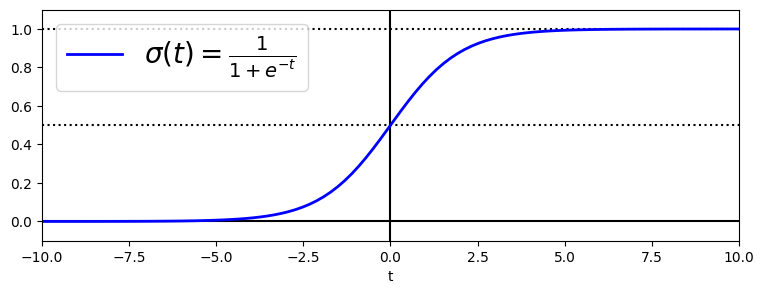

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

## Training and Cost Function
El objetivo del entrenamiento es ajustar los parámetros del vector $\theta$ de forma que el modelo estime las altas probabilidades de las instancias positivas y las bajas probabilidades de las instancias negativas.

**Cost function of a single training instance**

$$c(\theta) =
\begin{cases}
-log(\hat{p}) & \text{if } y = 1 \\
-log(1 - \hat{p}) & \text{if } y = 0
\end{cases}$$

La función de pérdida de todo el set de entrenamiento es simplemente la media de todas las instancias de entrenamiento.
**Logistic Regression cost function (log loss)**

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right]$$

Las malas noticias es que no existe una forma cerrada de calcular el valor de $\theta$ que minimice esta función de pérdida.La buena noticia es que la función de pérdida es convexa, de fomra que el Descenso del Gradiente (u otro algoritmo de optimización) está garantizado a encontrar el mínimo global.

**Logistic cost function partial derivatives**

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ \sigma(\theta^T x^{(i)}) - y^{(i)} \right] x_j^{(i)}$$

## **Límites de decisión**

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(int)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

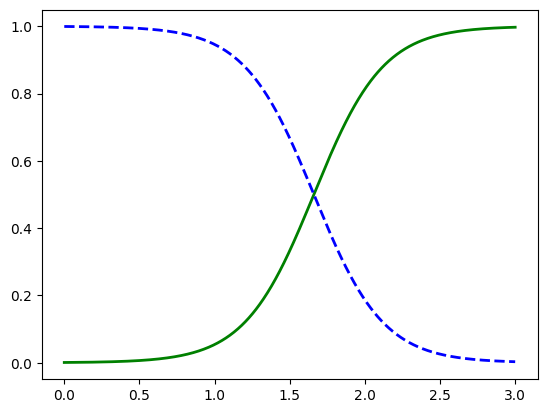

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

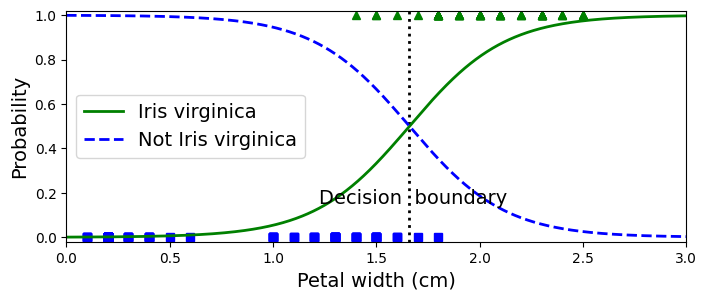

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
#plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
#plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

La imagen representa en triángulos verde las plantas Iris-Virginica de 1.4cm a 2.5cm, mientras que las otras flores iris (representradas por cuadrados) generalmente tienen un rango más pequeño de anchura, que va de 0.1cm a 1.8cm. Hay que notar que existe un poco de traslape. Al rededor d elos 2cm es muy probable qu ela flor sea una Iris-Virgnica.
Entre los extremos, el clasificador es incierto.

Existe un *límite de decisión* al rededor de 1.6cm donde ambas probabilidades son igualmente 50%. Un centímetro de diferencia haría que el clasificador escoja una predicción u otra, a pesar de no ser del todo confiable.

In [ ]:
decision_boundary

array([1.66066066])

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## **Softmax Regression**

El modelo de Regresión Logística  puede ser generalizado apra soportar múltiples clases directamente, sin tener que entrenar y combinar múltiples clasificadores binarios. A esto se le conoce como *softmax Regression* o *Multinomial Logistic Regression*.

La idea es un poco simple: dada una instancia **x**, el modelo de Regresión Softmax calcula primeramente una calificación $s_k(x)$ para cada clase *k*, luego estima la probabilidad de cada clase aplicando una *función softmax* (tambén conocida como *exponencial normalizada*) a las calificaciones. La ecuación a calcular $s_k(x)$ debería parecer familiar, es como la ecuación de una Regresión lineal.

 $$ s_k(\mathbf{x}) = \mathbf{x}^T\boldsymbol{\theta}^{(k)} $$
Una vez que se halla calculado la calificación de cada clase para cada instancia *x*, puedes estimar la probabilidad $\hat{p}_k$ de que la instancia pertencezca a la clase *k* corriendo las calificaciones a través de la función softmax: calcula la exponencial de cada calificación, luego las normaliza (dividiendo por la suma de todas las exponenciales). Las calificaciones son generalmente llamadas *logits* o *log-odds*.

*Función Softmax*.
$$ \hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K} \exp(s_j(\mathbf{x}))} $$
* *K* es el número de clases.
* $s(x)$ es el vector cque contiene las calificaciones de cada clase por instancia.
* $\sigma(s(x))_k$ es la probabilidad estimada de que la instancia *x* pertenezca a la clase *k* dadas las puntuaciones de cada clase por instancia.


Justo como el clasificador de Regresión logística, la regresión Softmax predice la clase con la más alta probabilidad (que es simplemente la calificación más alta).

*Predicción del clasificador de Regresión Softmax*.
$$ \hat{y} = \underset{k}{\mathrm{argmax}} \, \sigma(\mathbf{s}(\mathbf{x}))_k = \underset{k}{\mathrm{argmax}} \, s_k(\mathbf{x}) = \underset{k}{\mathrm{argmax}} \left( (\boldsymbol{\theta}^{(k)})^T \mathbf{x} \right) $$

* El operador *argmax* retorna el valor de una variable que maximiza una función. En esta ecuación, se retorna el valor de *k* que maximiza la probabilidad estimada $\sigma(s(x))_k$.


**El clasificador Softmax Regression predice solamente una clase a la vez (es decir, es multiclase, no multisalida), así que debería ser usada solamente con una clases mutuamente exclusivas como distintos tipos de plantas. No se puede utilizar para reconocer múltiples personas en una fotografía.**

Esta regresión trata de minimizar la función de pérdida, llamada *cross entropy*, y se utiliza normalmente para medir cómo de bien un set de probabilidades de clases estimadas conciden con las clases objetivo.

*Función de costo de Cross entropy*

$$ J(\boldsymbol{\Theta}) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{p}_k^{(i)}) $$


* $y_k^{(i)}$ es la probabilidad objetivo de que la instancia $i^{th}$ pertence a la clase *k*.

Hay que notar que cuando se tienen solamente dos clases (*K = 2*), esta función de pérdida es equivalente a la función de pérdida de la Regresión Logística.

*Vector de Gradiente de Cross Entropy para la clase k*
 $$ \nabla_{\boldsymbol{\theta}^{(k)}} J(\boldsymbol{\Theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{p}_k^{(i)} - y_k^{(i)} \right) \mathbf{x}^{(i)} $$





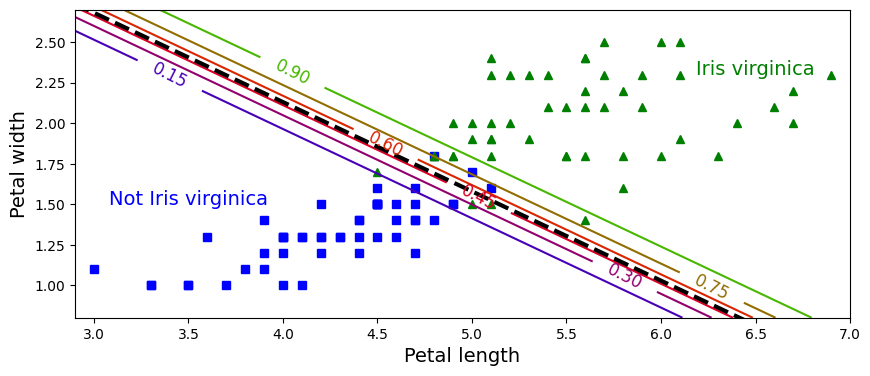

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

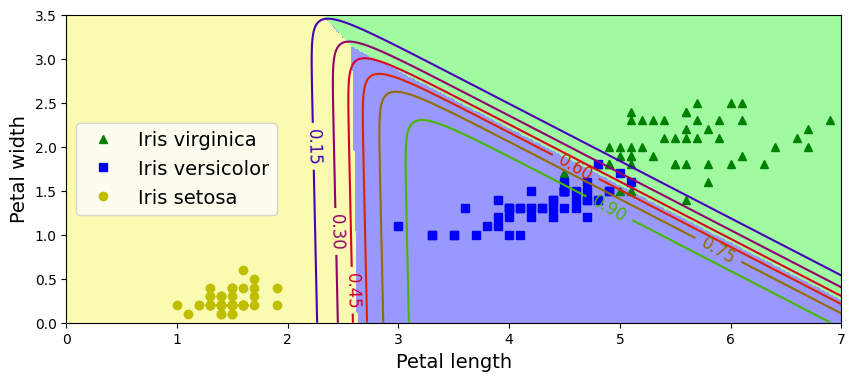

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])